In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

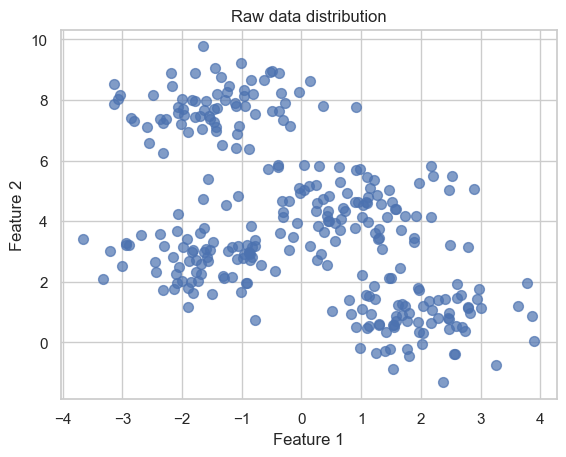

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成示例数据
points, cluster_indexs = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
x = points[:, 0]
y = points[:, 1]

# 可视化原始数据
plt.scatter(x, y, s=50, alpha=0.7)
plt.title('Raw data distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

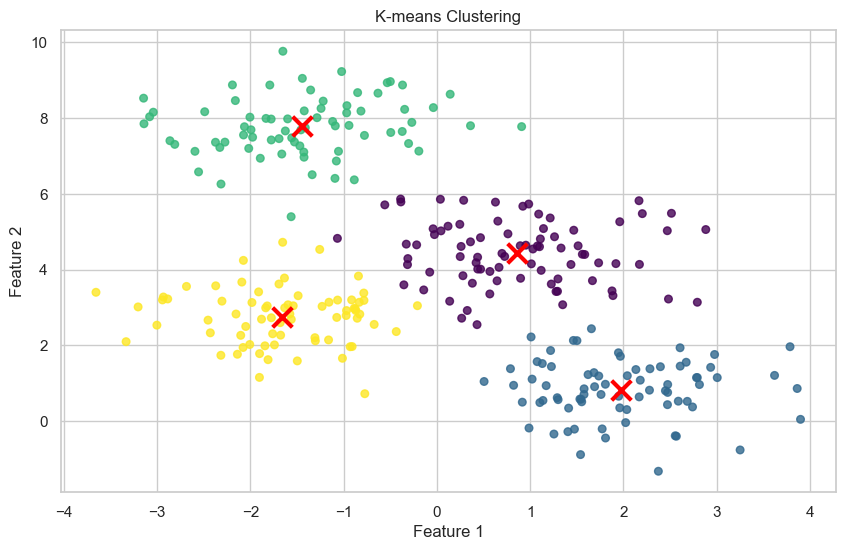

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成示例数据
points, cluster_indexs = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
x = points[:, 0]
y = points[:, 1]

# 可视化原始数据
# plt.scatter(x, y, s=50, alpha=0.7)

# 应用K-means算法
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)

# 获取聚类标签和中心点
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=labels, s=30, alpha=0.8, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

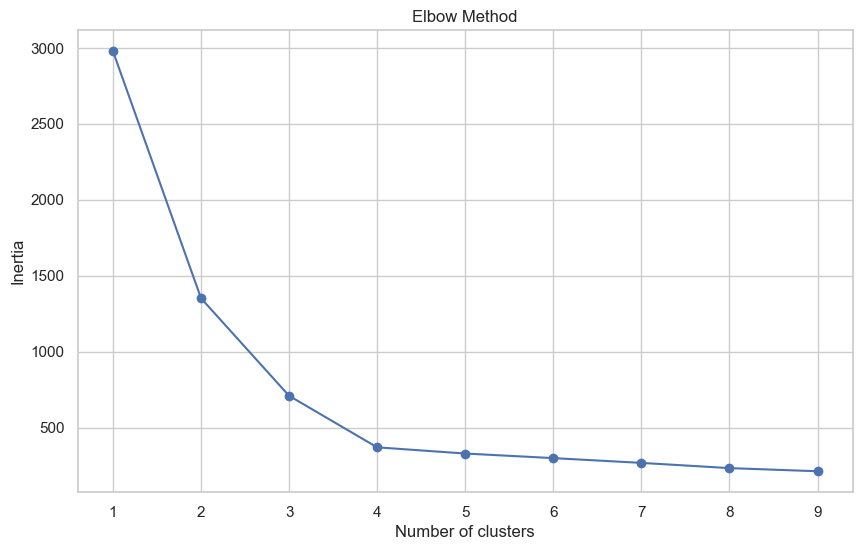

In [34]:
# 计算不同K值对应的惯性
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
import pandas as pd

customers = pd.read_csv('data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


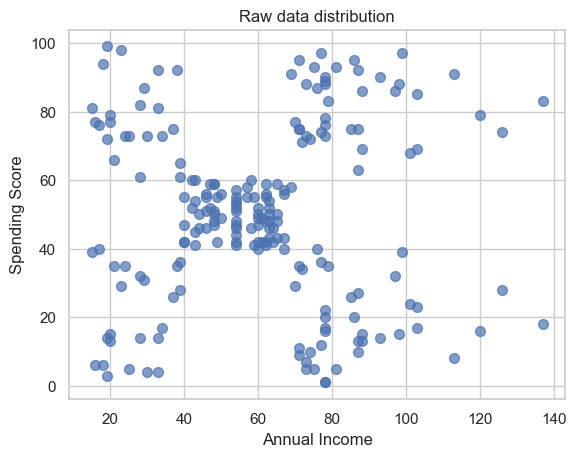

In [36]:
import matplotlib.pyplot as plt

points = customers.iloc[:, 3:5].values
x=points[:, 0]
y=points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.title('Raw data distribution')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

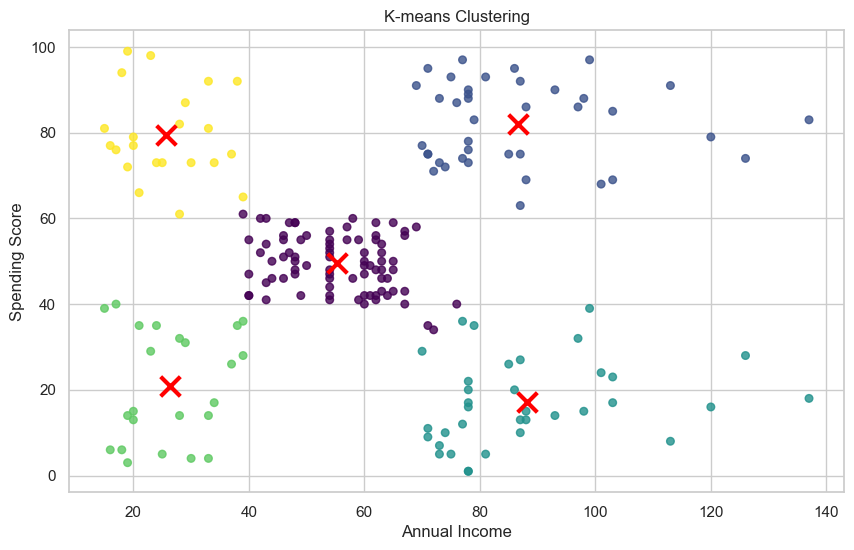

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=labels, s=30, alpha=0.8, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [38]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
# df.head()

cluster = kmeans.predict([[120, 20]])[0]

# 过滤属于指定聚类的客户
clustered_df = df[df['Cluster'] == cluster]
clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2


In [39]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


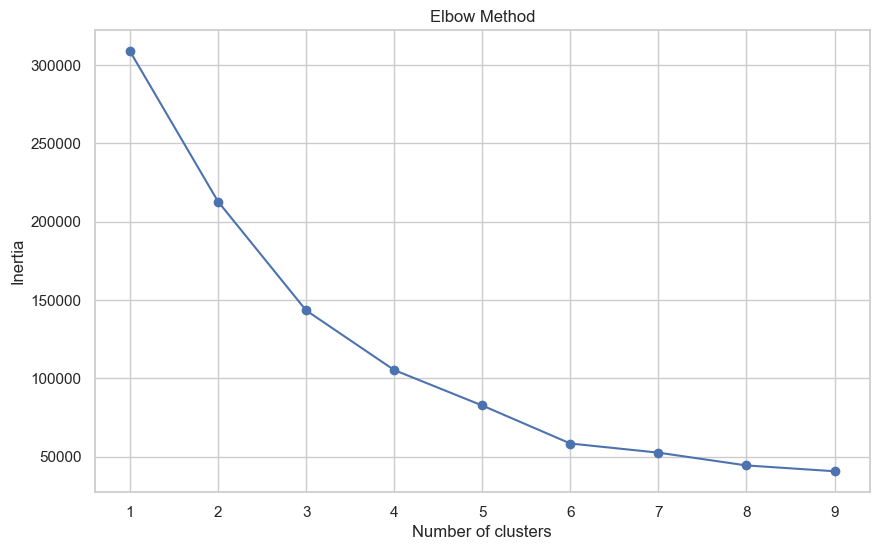

In [40]:
point = df.iloc[:, 1:5].values
inertias = []

K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(point)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
keams = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,7
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [66]:
results = pd.DataFrame(columns=['Cluster', 'Average Age', 'Average Income', 'Average Spending Score', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    clustered_df = df[df['Cluster'] == i]
    age = clustered_df['Age'].mean()
    income = clustered_df['Annual Income (k$)'].mean()
    spending_score = clustered_df['Spending Score (1-100)'].mean()
    females = clustered_df[clustered_df['Gender'] == 0].shape[0]
    males = clustered_df[clustered_df['Gender'] == 1].shape[0]
    
    results.loc[i] = ([i, age, income, spending_score, females, males])
    
results.head()

,Cluster,Average Age,Average Income,Average Spending Score,Number of Females,Number of Males
0,0.0,41.936170,62.234043,47.553191,27.0,20.0
1,1.0,32.625000,80.375000,82.937500,17.0,15.0
2,2.0,40.875000,79.708333,14.291667,9.0,15.0
3,3.0,41.363636,28.181818,33.272727,7.0,4.0
4,4.0,25.333333,25.095238,80.047619,12.0,9.0
